# FinanceDataReader Tutorial
## 여러 종목 가격을 한번에

<img width="320px" src="https://i.imgur.com/r0YE5Xs.png" ><br>
https://github.com/FinanceData/FinanceDataReader


#### 2018-2020 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)


## 요약
1. 리스트컴프리핸션을 잘 사용하면 다수의 종목을 한번에 조회하고 결과를 취합할 수 있습니다.
1. pd.concat(df_list, axis=1)을 사용하여 다수의 컬럼을 결합할 수 있습니다.
1. df.plot()의 secondary_y 옵션을 사용하면 서로 다른 범위의 데이터를 비교하기 용이합니다.
1. 첫번째 행으로 모든 행을 나누어주는 간단한 방법으로 기간 수익률을 손쉽게 구할 수 있습니다.

## 한글 폰트 설치, matplotlib 설정

In [0]:
!apt -qq install fonts-nanum*

In [0]:
# matplotlib rebuild
import matplotlib as mpl
mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

한글이 제대로 표시되지 않는 경우 메뉴의 런타임을 다시 시작("런타임 / 런타임 다시 시작..."을 선택)하고 처음 셀 부터 실행합니다.

<img src="https://i.imgur.com/YjZ8Tx1.png" >


## FinanceDataReader 설치

In [0]:
!pip -q install finance-datareader

# 한 종목의 가격 가져오기

In [4]:
import FinanceDataReader as fdr

# KB금융 (105560)
df = fdr.DataReader('105560', '2019-01-01', '2019-12-31')
df.head(15)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,46700,46900,45600,45950,636199,-0.011828
2019-01-03,46600,46800,46200,46450,1275976,0.010881
2019-01-04,46500,46600,45600,45650,784105,-0.017223
2019-01-07,45800,46650,45450,45450,957133,-0.004381
2019-01-08,45900,45950,45300,45500,868450,0.001100
2019-01-09,46050,46650,45800,46450,885435,0.020879
2019-01-10,46500,46500,45500,45500,1195029,-0.020452
2019-01-11,45550,46100,45150,45350,1077396,-0.003297
2019-01-14,45450,45850,44400,44550,1189035,-0.017641


# 여러 종목의 종가(Close) 가져오기
다수 종목의 데이터를 가져와 개별 종목의 종가를 pd.concat()로 합칩니다

In [0]:
stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],
]

In [6]:
import pandas as pd

df_list = [fdr.DataReader(code, '2019-01-01', '2019-12-31')['Close'] for name, code in stock_list]
len(df_list)

8

In [7]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2019-01-02,38750,60600,114000,204879,337000,237000,104000,118000
2019-01-03,37600,57700,116500,201058,328000,237000,104500,122000
2019-01-04,37450,58300,119500,210132,330500,239000,107000,125500
2019-01-07,38750,58700,120500,206311,343000,246000,108000,131500
2019-01-08,38100,59200,119500,203923,349500,245500,107000,130000
2019-01-09,39600,63600,123000,204401,352000,255500,109000,133000
2019-01-10,39800,65300,123000,206789,347000,258500,108500,131000
2019-01-11,40500,65100,123000,206789,349000,255500,109000,131000
2019-01-14,40050,62100,121500,201536,350500,250000,109500,127000


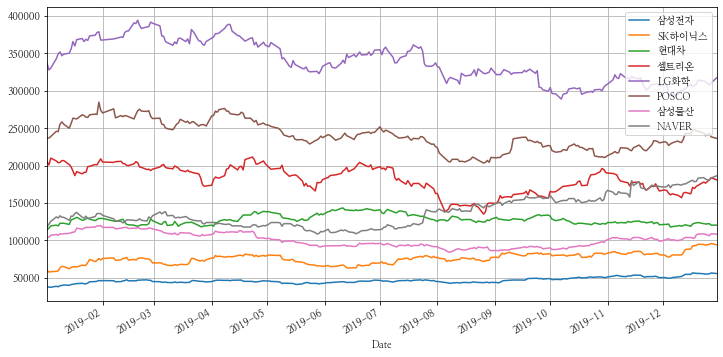

In [8]:
df.plot()

다수의 종목을 한번에 차트로 그려낼 수 있습니다. 

하지만 종목간의 비교를 하기 쉽지 않네요. 2개 종목만 그려봅니다.

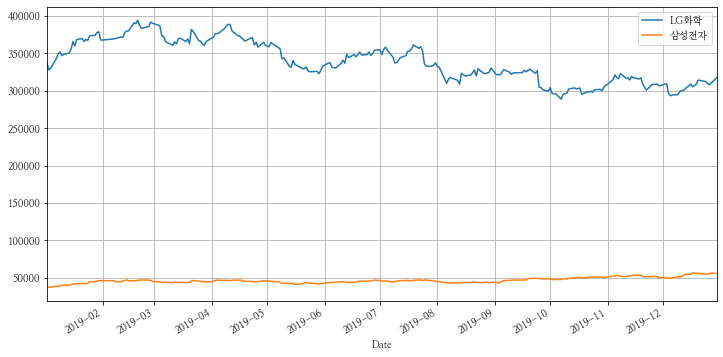

In [9]:
df[['LG화학', '삼성전자']].plot()

종목간의 가격차이가 커서 서로 비교하기가 어렵습니다. 

이때, secondary_y 옵션을 활용하면 서로 다른 영역을 비교하기 용이합니다.

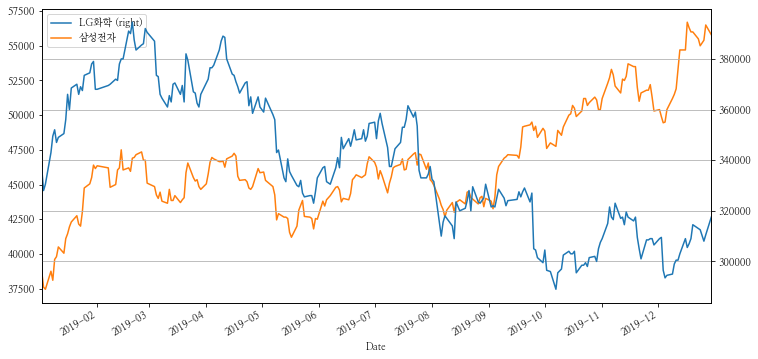

In [10]:
df[['LG화학', '삼성전자']].plot(secondary_y=['LG화학'])

두 개의 종목('LG화학', '삼성전자')이 서로 다른 행보를 가지는 것은 보이지만 시작점이 다르기 떄문에 시간에 따른 변화를 보기 쉽지 않습니다. 

시작점을 0으로 동일하게 맞추고 시간에 따른 수익률을 보기 위해 첫 번째 행(row)으로 모든 행(row)을 나누고 1.0을 빼줍니다.

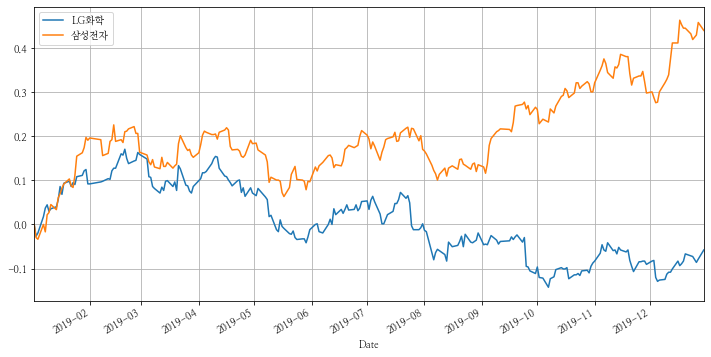

In [11]:
df2 = df[['LG화학', '삼성전자']]

df_plot = df2 / df2.iloc[0] - 1.0
df_plot.plot()

# 개별 종목의 2019년 수익률 비교

전체 종목의 성과(performance)를 시각화 해봅니다


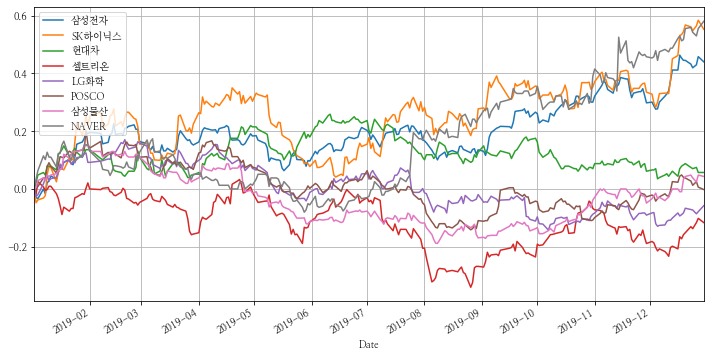

In [12]:
df_norm = df / df.iloc[0] - 1
df_norm.plot()

수익률이 큰 종목부터 순으로 나열해 봅니다. 가장 마지막날 (2019-12-30)의 수익률을 확인해 봅니다.

In [13]:
df_norm.iloc[-1].sort_values(ascending=False)

NAVER     0.580508
SK하이닉스    0.552805
삼성전자      0.440000
현대차       0.057018
삼성물산      0.043269
POSCO    -0.002110
LG화학     -0.057864
셀트리온     -0.116552
Name: 2019-12-30 00:00:00, dtype: float64

2019년 가장 좋은 수익률은 NAVER 58.0%, SK하이닉스 55.2% 이며 반대로 

LG화학과 셀트리온이 각각 -5.7%, -11.6%를 년 수익률을 기록했습니다.

이처럼, FinanceDataReader와 pandas의 몇가지 기능을 활용하면 손쉽게 다수 종목에 대한 기간 수익률 비교가 가능합니다.


#### 2018-2020 [FinanceData.KR](http://financedata.kr) | [facebook.com/financedata](http://facebook.com/financedata)
